# Data Analysis Over Multiple JSON Data Files from the Unity Experiment Application

Given several JSON files containing experiment data, apply a variety of analytical techniques to summarise and interpret the data

## Imports and Setup

In [1]:
import Rotor
import json
import math
import numpy as np
import copy
import matplotlib.pyplot as plt

## Compile JSON Data into single Dictionaries

In [2]:
# List of data files
data_files = [
    "1-29-01-2022-13-30.json",
    "2-30-01-2022-13-00.json",
    "3-30-01-2022-19-00.json",
    "4-31-01-2022-16-00.json",
    "5-05-02-2022-17-00.json"
]

directory_prefix = "data/" # "../raw"

# Temp test dictionary to be copied
temp = {
    "Shape Match":{
        "Loaded Shape":[],
        "Selected Shape":[],
        "Time Taken":[],
        "Time Remaining":[],
        "W Count":[],
        "Swipe Count":[],
        "Initial Rotor":[],
        "Final Rotor":[],
        "Confidence":[],
        "Understanding":[],
    },
    "Rotation Match":{
        "Loaded Shape":[],
        "Texture":[],
        "Time Taken":[],
        "Time Remaining":[],
        "Loaded Rotation":[],
        "Selected Rotation":[],
        "Confidence":[],
        "Understanding":[],
    },
    "Pose Match":{
        "Loaded Shape":[],
        "Texture":[],
        "Time Taken":[],
        "Time Remaining":[],
        "W Count":[],
        "Swipe Count":[],
        "Main Rotor":[],
        "Match Rotor":[],
        "Initial Match Rotor":[],
        "Ease":[],
    }
}

# Unordered dictionary grouped by representation
compiled_data = {
    "Control": copy.deepcopy(temp),
    "Timeline": copy.deepcopy(temp),
    "4D-3D": copy.deepcopy(temp),
    "Multi-View": copy.deepcopy(temp),
}

# Ordered dictionary grouped by user use over time
ordered_data = {
    0: copy.deepcopy(temp),
    1: copy.deepcopy(temp),
    2: copy.deepcopy(temp),
    3: copy.deepcopy(temp),
}
ordered_data[0]["Representations"] = []
ordered_data[1]["Representations"] = []
ordered_data[2]["Representations"] = []
ordered_data[3]["Representations"] = []

# Iterate through listed files and add them to 
# the compiled data and order based data
for file in data_files:
    # Get file name
    filename = directory_prefix+file
    print("Reading \"" + filename + "\"")

    # Try open file
    # Skip on fail
    try:
        with open(filename, "r") as f:
            data = json.load(f)
    except Exception as e:
        print(e)
        continue


    o = -1

    # Iterate through the files data
    # Copy the data to the single data structure
    for rep, tests in data.items():

        # iterate through the number of tests for shape match and pose match
        for i in range(5):

            # Copy Shape Match Data
            compiled_data[rep]["Shape Match"]["Loaded Shape"].append( tests["Shape_Match"]["Shape_Match{0}".format(i)]["Loaded Shape"] )
            compiled_data[rep]["Shape Match"]["Selected Shape"].append( tests["Shape_Match"]["Shape_Match{0}".format(i)]["Selected Shape"] )

            compiled_data[rep]["Shape Match"]["Time Taken"].append( tests["Shape_Match"]["Shape_Match{0}".format(i)]["Time"] )
            compiled_data[rep]["Shape Match"]["Time Remaining"].append( 20 - tests["Shape_Match"]["Shape_Match{0}".format(i)]["Time"] )

            compiled_data[rep]["Shape Match"]["W Count"].append( tests["Shape_Match"]["Shape_Match{0}".format(i)]["W Count"] )
            compiled_data[rep]["Shape Match"]["Swipe Count"].append( tests["Shape_Match"]["Shape_Match{0}".format(i)]["Swipe Count"] )

            compiled_data[rep]["Shape Match"]["Initial Rotor"].append( tests["Shape_Match"]["Shape_Match{0}".format(i)]["Initial Rotation"] )
            compiled_data[rep]["Shape Match"]["Final Rotor"].append( tests["Shape_Match"]["Shape_Match{0}".format(i)]["Final Rotation"] )

            compiled_data[rep]["Shape Match"]["Confidence"].append( tests["Shape_Match"]["Shape_Match{0}_Survey".format(i)]["confidance"] )
            compiled_data[rep]["Shape Match"]["Understanding"].append( tests["Shape_Match"]["Shape_Match{0}_Survey".format(i)]["behaviour"] )

            # Copy Rotation Match Data
            compiled_data[rep]["Rotation Match"]["Loaded Shape"].append( tests["Rotation_Match"]["Rotation_Match{0}".format(i)]["Shape"] )
            compiled_data[rep]["Rotation Match"]["Texture"].append( tests["Rotation_Match"]["Rotation_Match{0}".format(i)]["Texture"] )

            compiled_data[rep]["Rotation Match"]["Time Taken"].append( tests["Rotation_Match"]["Rotation_Match{0}".format(i)]["Time"] )
            compiled_data[rep]["Rotation Match"]["Time Remaining"].append( 60 - tests["Rotation_Match"]["Rotation_Match{0}".format(i)]["Time"] )

            compiled_data[rep]["Rotation Match"]["Loaded Rotation"].append( tests["Rotation_Match"]["Rotation_Match{0}".format(i)]["Loaded Rotation"] )
            compiled_data[rep]["Rotation Match"]["Selected Rotation"].append( tests["Rotation_Match"]["Rotation_Match{0}".format(i)]["Selected Rotation"] )
            
            compiled_data[rep]["Rotation Match"]["Confidence"].append( tests["Rotation_Match"]["Rotation_Match{0}_Survey".format(i)]["confidance"] )
            compiled_data[rep]["Rotation Match"]["Understanding"].append( tests["Rotation_Match"]["Rotation_Match{0}_Survey".format(i)]["behaviour"] )
        
        # iterate through the number of tests for pose matching
        for i in range(3):
            
            # Copy Pose Match Data
            compiled_data[rep]["Pose Match"]["Loaded Shape"].append( tests["Pose_Match"]["Pose_Match{0}".format(i)]["Shape"] )
            compiled_data[rep]["Pose Match"]["Texture"].append( tests["Pose_Match"]["Pose_Match{0}".format(i)]["Texture"] )
            
            compiled_data[rep]["Pose Match"]["Time Taken"].append( tests["Pose_Match"]["Pose_Match{0}".format(i)]["Time"] )
            compiled_data[rep]["Pose Match"]["Time Remaining"].append( 180 - tests["Pose_Match"]["Pose_Match{0}".format(i)]["Time"] )
            
            compiled_data[rep]["Pose Match"]["W Count"].append( tests["Pose_Match"]["Pose_Match{0}".format(i)]["W Count"] )
            compiled_data[rep]["Pose Match"]["Swipe Count"].append( tests["Pose_Match"]["Pose_Match{0}".format(i)]["Swipe Count"] )
            
            compiled_data[rep]["Pose Match"]["Main Rotor"].append( tests["Pose_Match"]["Pose_Match{0}".format(i)]["Main Rotor"] )
            compiled_data[rep]["Pose Match"]["Match Rotor"].append( tests["Pose_Match"]["Pose_Match{0}".format(i)]["Match Rotor"] )
            compiled_data[rep]["Pose Match"]["Initial Match Rotor"].append( tests["Pose_Match"]["Pose_Match{0}".format(i)]["Initial Match Rotor"] )

            compiled_data[rep]["Pose Match"]["Ease"].append( tests["Pose_Match"]["Pose_Match{0}_Survey".format(i)]["confidance"] )
    
    # Iterate through the files data
    # Copy the data to the single order based data structure

        # List the representations to match file order
        o += 1
        ordered_data[o]["Representations"].append(rep)

        # iterate through the number of tests for shape match and pose match
        for i in range(5):
            
            # Copy Shape Match Data
            ordered_data[o]["Shape Match"]["Loaded Shape"].append( tests["Shape_Match"]["Shape_Match{0}".format(i)]["Loaded Shape"] )
            ordered_data[o]["Shape Match"]["Selected Shape"].append( tests["Shape_Match"]["Shape_Match{0}".format(i)]["Selected Shape"] )

            ordered_data[o]["Shape Match"]["Time Taken"].append( tests["Shape_Match"]["Shape_Match{0}".format(i)]["Time"] )
            ordered_data[o]["Shape Match"]["Time Remaining"].append( 20 - tests["Shape_Match"]["Shape_Match{0}".format(i)]["Time"] )

            ordered_data[o]["Shape Match"]["W Count"].append( tests["Shape_Match"]["Shape_Match{0}".format(i)]["W Count"] )
            ordered_data[o]["Shape Match"]["Swipe Count"].append( tests["Shape_Match"]["Shape_Match{0}".format(i)]["Swipe Count"] )

            ordered_data[o]["Shape Match"]["Initial Rotor"].append( tests["Shape_Match"]["Shape_Match{0}".format(i)]["Initial Rotation"] )
            ordered_data[o]["Shape Match"]["Final Rotor"].append( tests["Shape_Match"]["Shape_Match{0}".format(i)]["Final Rotation"] )

            ordered_data[o]["Shape Match"]["Confidence"].append( tests["Shape_Match"]["Shape_Match{0}_Survey".format(i)]["confidance"] )
            ordered_data[o]["Shape Match"]["Understanding"].append( tests["Shape_Match"]["Shape_Match{0}_Survey".format(i)]["behaviour"] )

            # Copy Rotation Match Data
            ordered_data[o]["Rotation Match"]["Loaded Shape"].append( tests["Rotation_Match"]["Rotation_Match{0}".format(i)]["Shape"] )
            ordered_data[o]["Rotation Match"]["Texture"].append( tests["Rotation_Match"]["Rotation_Match{0}".format(i)]["Texture"] )

            ordered_data[o]["Rotation Match"]["Time Taken"].append( tests["Rotation_Match"]["Rotation_Match{0}".format(i)]["Time"] )
            ordered_data[o]["Rotation Match"]["Time Remaining"].append( 60 - tests["Rotation_Match"]["Rotation_Match{0}".format(i)]["Time"] )

            ordered_data[o]["Rotation Match"]["Loaded Rotation"].append( tests["Rotation_Match"]["Rotation_Match{0}".format(i)]["Loaded Rotation"] )
            ordered_data[o]["Rotation Match"]["Selected Rotation"].append( tests["Rotation_Match"]["Rotation_Match{0}".format(i)]["Selected Rotation"] )
            
            ordered_data[o]["Rotation Match"]["Confidence"].append( tests["Rotation_Match"]["Rotation_Match{0}_Survey".format(i)]["confidance"] )
            ordered_data[o]["Rotation Match"]["Understanding"].append( tests["Rotation_Match"]["Rotation_Match{0}_Survey".format(i)]["behaviour"] )
        
        # iterate through the number of tests for pose matching
        for i in range(3):
            
            # Copy Pose Match Data
            ordered_data[o]["Pose Match"]["Loaded Shape"].append( tests["Pose_Match"]["Pose_Match{0}".format(i)]["Shape"] )
            ordered_data[o]["Pose Match"]["Texture"].append( tests["Pose_Match"]["Pose_Match{0}".format(i)]["Texture"] )
            
            ordered_data[o]["Pose Match"]["Time Taken"].append( tests["Pose_Match"]["Pose_Match{0}".format(i)]["Time"] )
            ordered_data[o]["Pose Match"]["Time Remaining"].append( 180 - tests["Pose_Match"]["Pose_Match{0}".format(i)]["Time"] )
            
            ordered_data[o]["Pose Match"]["W Count"].append( tests["Pose_Match"]["Pose_Match{0}".format(i)]["W Count"] )
            ordered_data[o]["Pose Match"]["Swipe Count"].append( tests["Pose_Match"]["Pose_Match{0}".format(i)]["Swipe Count"] )
            
            ordered_data[o]["Pose Match"]["Main Rotor"].append( tests["Pose_Match"]["Pose_Match{0}".format(i)]["Main Rotor"] )
            ordered_data[o]["Pose Match"]["Match Rotor"].append( tests["Pose_Match"]["Pose_Match{0}".format(i)]["Match Rotor"] )
            ordered_data[o]["Pose Match"]["Initial Match Rotor"].append( tests["Pose_Match"]["Pose_Match{0}".format(i)]["Initial Match Rotor"] )

            ordered_data[o]["Pose Match"]["Ease"].append( tests["Pose_Match"]["Pose_Match{0}_Survey".format(i)]["confidance"] )


print("Compiled Data in compiled_data.json and ordered_data.json")

# Write out data
with open("compiled_data.json", "w") as f:
    f.write(json.dumps(compiled_data, indent=4))

with open("ordered_data.json", "w") as f:
    f.write(json.dumps(ordered_data, indent=4))


Reading "data/1-29-01-2022-13-30.json"
Reading "data/2-30-01-2022-13-00.json"
Reading "data/3-30-01-2022-19-00.json"
Reading "data/4-31-01-2022-16-00.json"
Reading "data/5-05-02-2022-17-00.json"
Compiled Data in compiled_data.json and ordered_data.json


## Data Analysis Functions 
Generic Helper Functions

In [3]:
# Generic Helper Functions

# Convert Radians to Degrees
# Rotors have double coverage
def rad_deg(x):
    return (x/(2*math.pi) ) *360

# Convert a list of the 8 components into a Rotor
def rotor_from_list(r):
    rotor = Rotor.Rotor4()
    rotor.constructor(r[0], r[1], r[2], r[3], r[4], r[5], r[6], r[7])
    return rotor

# Jaccard Index - similarity between 2 boolean arrays
def jaccard_index(a, b):
    intersection = np.logical_and(a, b)
    union = np.logical_or(a, b)
    return np.sum(intersection) / np.sum(union)

### Shape Matching
The number of correct and incorrect answered questions as well as the number of non-answers

In [4]:
# Correctness Count
# Count the number of correct answers
def SHAPE_correct_count(data):
    count = {}

    # iterate through each key
    for key, value in data.items():
        count[key] = 0

        # iterate through all the shapes and 
        # if they match, increment the correct selection count
        for i in range(len(value["Shape Match"]["Loaded Shape"])):
            if value["Shape Match"]["Selected Shape"][i] in \
               value["Shape Match"]["Loaded Shape"][i]:
                count[key] += 1
    
    return count

# Count the number of incorrect answers, excluding non-answers
def SHAPE_incorrect_count(data):
    count = {}

    # iterate through each key
    for key, value in data.items():
        count[key] = 0

        # iterate through all the shapes and 
        # if they do not match, increment the counter
        # do not include non-answers
        for i in range(len(value["Shape Match"]["Loaded Shape"])):
            if value["Shape Match"]["Selected Shape"][i] not in \
               value["Shape Match"]["Loaded Shape"][i] and \
               value["Shape Match"]["Selected Shape"][i] != "None":
                count[key] += 1
    
    return count

# Count the number of non-answers
def SHAPE_unanswered_count(data):
    count = {}

    # iterate through each key
    for key, value in data.items():
        count[key] = 0

        # iterate through all the shapes and 
        # if the user did not answer, increment the counter
        for i in range(len(value["Shape Match"]["Loaded Shape"])):
            if value["Shape Match"]["Selected Shape"][i] == "None":
                count[key] += 1
    
    return count

The average time taken for every shape match test, correct answers and incorrect answers (not including unanswered tests)

In [5]:
# Time Taken
# Data for the amount of time for every test, 
# separated by rep or order depending on data
def SHAPE_time_data(data):
    times = {}

    # iterate through each key
    for key, value in data.items():
        times[key] = []
        
        # iterate through all the times and 
        # if the user did not answer, increment the counter
        for i in range(len(value["Shape Match"]["Time Taken"])):
            times[key].append(value["Shape Match"]["Time Taken"][i])

    return times

# The average amount of time taken 
# separated by rep or order depending on data
def SHAPE_mean_time(data):
    average_time = {}
    d = SHAPE_time_data(data)

    for key, value in d.items():
        average_time[key] = np.mean(value)
    return average_time

# The average amount of time taken for correct answers
def SHAPE_mean_time_correct(data):
    times = {}
    average = {}

    # iterate through each key
    for key, value in data.items():
        times[key] = []
        
        # iterate through all the times and 
        # if the user did not answer, increment the counter
        for i in range(len(value["Shape Match"]["Time Taken"])):
            if value["Shape Match"]["Selected Shape"][i] in \
               value["Shape Match"]["Loaded Shape"][i]:
                times[key].append(value["Shape Match"]["Time Taken"][i])
        
        average[key] = np.mean(times[key])

    return average

# The average amount of time taken for incorrect answers
# excluding unanswered unanswered
def SHAPE_mean_time_incorrect(data):
    times = {}
    average = {}

    # iterate through each key
    for key, value in data.items():
        times[key] = []
        
        # iterate through all the times and 
        # if the user did not answer, increment the counter
        for i in range(len(value["Shape Match"]["Time Taken"])):
            if value["Shape Match"]["Selected Shape"][i] not in \
               value["Shape Match"]["Loaded Shape"][i] and \
               value["Shape Match"]["Selected Shape"][i] != "None":
                times[key].append(value["Shape Match"]["Time Taken"][i])
        
        average[key] = np.mean(times[key])

    return average

The users interaction with the W axis slider and rotating the object

In [6]:
# User Interaction
# Count number of 
def SHAPE_w_count(data):
    count = {}

    # iterate through each key
    for key, value in data.items():
        # iterate through all the shapes and count up the uses of w
        count[key] = np.sum( value["Shape Match"]["W Count"] )
    return count

# Swipe Count
def SHAPE_swipe_count(data):
    count = {}

    # iterate through each key
    for key, value in data.items():
        # iterate through all the shapes and count up the uses of w
        count[key] = np.sum( value["Shape Match"]["Swipe Count"] )
    return count

Output the above data

In [7]:
# Output Data
def SHAPE_output(data):
    print("Number of correct answers:                     ", SHAPE_correct_count(data))
    print("Number of incorrect answers:                   ", SHAPE_incorrect_count(data))
    print("Number of unanswered:                          ", SHAPE_unanswered_count(data))
    #print(SHAPE_time_data_per_key(data))
    print("Mean time to answer:             ", SHAPE_mean_time(data))
    print("Mean time for correct answers:   ", SHAPE_mean_time_correct(data))
    print("Mean time for incorrect answers: ", SHAPE_mean_time_incorrect(data))
    print("Number of interactions with the W axis slider: ", SHAPE_w_count(data))
    print("Number of times the object was rotated:        ", SHAPE_swipe_count(data))

# Read in data

print("Data per Representation:")
with open("compiled_data.json", "r") as f:
    data = json.load(f)
    SHAPE_output(data)

print("\nData based on Order:")
with open("ordered_data.json", "r") as f:
    data = json.load(f)
    SHAPE_output(data)



Data per Representation:
Number of correct answers:                      {'Control': 18, 'Timeline': 11, '4D-3D': 16, 'Multi-View': 17}
Number of incorrect answers:                    {'Control': 4, 'Timeline': 8, '4D-3D': 5, 'Multi-View': 6}
Number of unanswered:                           {'Control': 3, 'Timeline': 6, '4D-3D': 4, 'Multi-View': 2}
Mean time to answer:              {'Control': 15.44029876708985, 'Timeline': 17.245665588378913, '4D-3D': 18.160015258789066, 'Multi-View': 16.04009765625}
Mean time for correct answers:    {'Control': 15.54337120056153, 'Timeline': 16.23758628151634, '4D-3D': 17.452232360839844, 'Multi-View': 14.162985409007353}
Mean time for incorrect answers:  {'Control': 11.538653373718276, 'Timeline': 17.438512802124023, '4D-3D': 18.94078979492188, 'Multi-View': 20.036356608072918}
Number of interactions with the W axis slider:  {'Control': 24, 'Timeline': 32, '4D-3D': 54, 'Multi-View': 18}
Number of times the object was rotated:         {'Control': 206,

Graphing Functions

In [8]:
# Graphing

Display Data per Representation

In [9]:
# Load in the data
with open("compiled_data.json", "r") as f:
    compiled_data = json.load(f)

with open("ordered_data.json", "r") as f:
    ordered_data = json.load(f)

order = [1,2,3,4]

Text(0.5, 0, 'Iteration of Test')

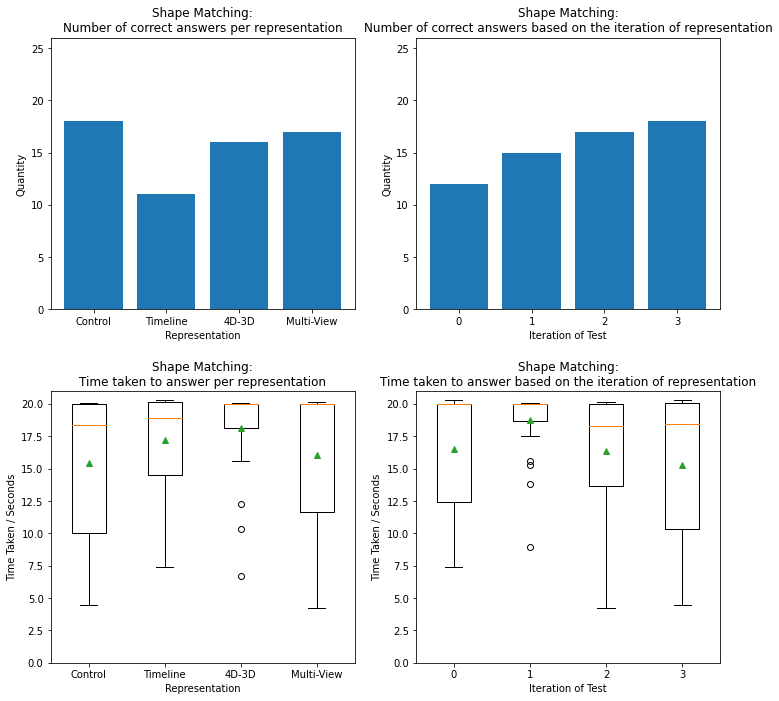

In [10]:
# Show Graphs
fig = plt.figure(figsize = (12, 18))
ax0 = fig.add_subplot(321)
ax1 = fig.add_subplot(322)
ax2 = fig.add_subplot(323)
ax3 = fig.add_subplot(324)
#ax4 = fig.add_subplot(325)
fig.subplots_adjust(hspace=0.3)

ax0.set_title("Shape Matching:\nNumber of correct answers per representation")
d = SHAPE_correct_count(compiled_data)
x = d.keys()
y = d.values()
ax0.bar(x, y)
ax0.set_ylim((0, 26))
ax0.set_ylabel("Quantity")
ax0.set_xlabel("Representation")

ax1.set_title("Shape Matching:\nNumber of correct answers based on the iteration of representation")
d = SHAPE_correct_count(ordered_data)
x = d.keys()
y = d.values()
ax1.bar(x, y)
ax1.set_ylim((0, 26))
ax1.set_ylabel("Quantity")
ax1.set_xlabel("Iteration of Test")

ax2.set_title("Shape Matching:\nTime taken to answer per representation")
x = SHAPE_time_data(compiled_data).keys()
d = [i for i in SHAPE_time_data(compiled_data).values()]
ax2.boxplot( d, showmeans=True )
ax2.set_xticks(order, x)
ax2.set_ylim((0, 21))
ax2.set_ylabel("Time Taken / Seconds")
ax2.set_xlabel("Representation")

ax3.set_title("Shape Matching:\nTime taken to answer based on the iteration of representation")
x = SHAPE_time_data(ordered_data).keys()
d = [i for i in SHAPE_time_data(ordered_data).values()]
ax3.boxplot( d, showmeans=True )
ax3.set_xticks(order, x)
ax3.set_ylim((0, 21))
ax3.set_ylabel("Time Taken / Seconds")
ax3.set_xlabel("Iteration of Test")

### Rotation Matching
The correctness and complexity of rotations

In [11]:
def ROTATE_jaccard_data(data):
    indices = {}

    # iterate through each key
    for key, value in data.items():
        indices[key] = []
        
        # iterate through all the tests and find the similarity between
        # boolean arrays of loaded and selected rotations
        for i in range(len(value["Rotation Match"]["Loaded Rotation"])):
            indices[key].append(
                jaccard_index(
                value["Rotation Match"]["Loaded Rotation"][i],
                value["Rotation Match"]["Selected Rotation"][i]
                )
            )

    return indices

def ROTATE_mean_jaccard(data):
    i = ROTATE_jaccard_data(data)
    for key, value in i.items():
        i[key] = np.mean(value)
    return i
    

def ROTATE_totally_correct_count(data):
    count = {}

    # iterate through each key
    for key, value in data.items():
        count[key] = 0
        
        # iterate through all the tests and find the similarity between
        # boolean arrays of loaded and selected rotations
        for i in range(len(value["Rotation Match"]["Loaded Rotation"])):
            if value["Rotation Match"]["Loaded Rotation"][i] == \
               value["Rotation Match"]["Selected Rotation"][i]:
                count[key] += 1

    return count

def ROTATE_no_of_rotations_data(data):
    count = {}

    # iterate through each key
    for key, value in data.items():
        count[key] = []
        
        # iterate through all the tests and append the sum of the number of rotations
        for i in range(len(value["Rotation Match"]["Loaded Rotation"])):
            count[key].append( np.sum(value["Rotation Match"]["Loaded Rotation"][i]) )

    return count

The average time taken for every rotation match test

In [12]:
# Data for the amount of time for every test, 
# separated by rep or order depending on data
def ROTATE_time_data(data):
    times = {}

    # iterate through each key
    for key, value in data.items():
        times[key] = []
        
        # iterate through all the times and 
        # if the user did not answer, increment the counter
        for i in range(len(value["Rotation Match"]["Time Taken"])):
            times[key].append(value["Rotation Match"]["Time Taken"][i])

    return times

# The average amount of time taken 
# separated by rep or order depending on data
def ROTATE_mean_time_data(data):
    average_time = {}
    d = ROTATE_time_data(data)

    for key, value in d.items():
        average_time[key] = np.mean(value)
    return average_time

    

Output the above data

In [13]:
# Output Data
def ROTATE_output(data):
    #print("The similarity between loaded and selected rotations: ", ROTATE_jaccard_data(data))
    print("The mean similarity of rotations:                     ", ROTATE_mean_jaccard(data))
    print("The number of totally correct answers:                ", ROTATE_totally_correct_count(data))
    #print("The number of rotations per test: ", ROTATE_no_of_rotations_data(data))
    #print(ROTATE_time_data(data))
    print("The mean time to answer:                              ", ROTATE_mean_time_data(data))

# Read in data

print("Data per Representation:")
with open("compiled_data.json", "r") as f:
    data = json.load(f)
    ROTATE_output(data)

print("\nData based on Order:")
with open("ordered_data.json", "r") as f:
    data = json.load(f)
    ROTATE_output(data)


Data per Representation:
The mean similarity of rotations:                      {'Control': 0.29333333333333333, 'Timeline': 0.44, '4D-3D': 0.35666666666666663, 'Multi-View': 0.406}
The number of totally correct answers:                 {'Control': 2, 'Timeline': 10, '4D-3D': 6, 'Multi-View': 4}
The mean time to answer:                               {'Control': 36.63287719726563, 'Timeline': 44.980301513671876, '4D-3D': 36.71018432617188, 'Multi-View': 37.111328125}

Data based on Order:
The mean similarity of rotations:                      {'0': 0.3666666666666667, '1': 0.46, '2': 0.35, '3': 0.31933333333333336}
The number of totally correct answers:                 {'0': 5, '1': 8, '2': 5, '3': 4}
The mean time to answer:                               {'0': 47.62491088867188, '1': 39.16109375, '2': 35.6775146484375, '3': 32.971171875}


Graphing Functions

In [14]:
# Graphing

Display Data

In [15]:
# Load in the data
with open("compiled_data.json", "r") as f:
    compiled_data = json.load(f)

with open("ordered_data.json", "r") as f:
    ordered_data = json.load(f)

order = [1,2,3,4]

Text(0.5, 0, 'Iteration of Test')

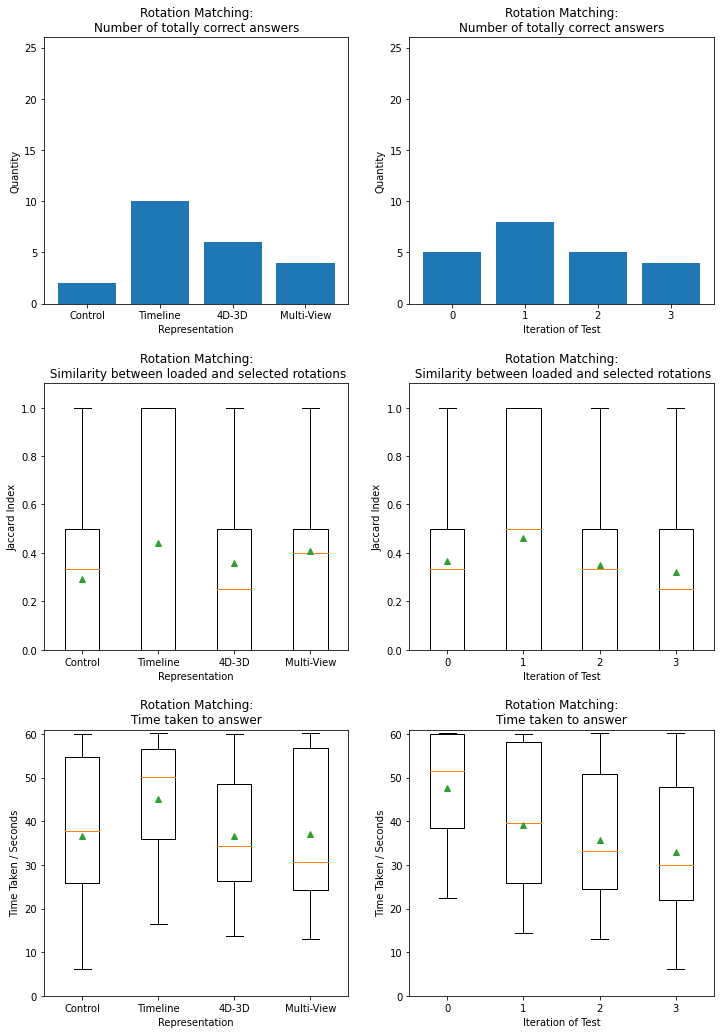

In [16]:
# Show Graphs
fig = plt.figure(figsize = (12, 24))
ax0 = fig.add_subplot(421)
ax1 = fig.add_subplot(422)
ax2 = fig.add_subplot(423)
ax3 = fig.add_subplot(424)
ax4 = fig.add_subplot(425)
ax5 = fig.add_subplot(426)
fig.subplots_adjust(hspace=0.3)

ax0.set_title("Rotation Matching:\nNumber of totally correct answers")
d = ROTATE_totally_correct_count(compiled_data)
x = d.keys()
y = d.values()
ax0.bar(x, y)
ax0.set_ylim((0, 26))
ax0.set_ylabel("Quantity")
ax0.set_xlabel("Representation")

ax1.set_title("Rotation Matching:\nNumber of totally correct answers")
d = ROTATE_totally_correct_count(ordered_data)
x = d.keys()
y = d.values()
ax1.bar(x, y)
ax1.set_ylim((0, 26))
ax1.set_ylabel("Quantity")
ax1.set_xlabel("Iteration of Test")

ax2.set_title("Rotation Matching:\n Similarity between loaded and selected rotations")
x = ROTATE_jaccard_data(compiled_data).keys()
d = [i for i in ROTATE_jaccard_data(compiled_data).values()]
ax2.boxplot( d, showmeans=True )
ax2.set_xticks(order, x)
ax2.set_ylim((0, 1.1))
ax2.set_ylabel("Jaccard Index")
ax2.set_xlabel("Representation")

ax3.set_title("Rotation Matching:\n Similarity between loaded and selected rotations")
x = ROTATE_jaccard_data(ordered_data).keys()
d = [i for i in ROTATE_jaccard_data(ordered_data).values()]
ax3.boxplot( d, showmeans=True )
ax3.set_xticks(order, x)
ax3.set_ylim((0, 1.1))
ax3.set_ylabel("Jaccard Index")
ax3.set_xlabel("Iteration of Test")

ax4.set_title("Rotation Matching:\nTime taken to answer")
x = ROTATE_time_data(compiled_data).keys()
d = [i for i in ROTATE_time_data(compiled_data).values()]
ax4.boxplot( d, showmeans=True )
ax4.set_xticks(order, x)
ax4.set_ylim((0, 61))
ax4.set_ylabel("Time Taken / Seconds")
ax4.set_xlabel("Representation")

ax5.set_title("Rotation Matching:\nTime taken to answer")
x = ROTATE_time_data(ordered_data).keys()
d = [i for i in ROTATE_time_data(ordered_data).values()]
ax5.boxplot( d, showmeans=True )
ax5.set_xticks(order, x)
ax5.set_ylim((0, 61))
ax5.set_ylabel("Time Taken / Seconds")
ax5.set_xlabel("Iteration of Test")


### Pose Matching
The mean, best and worst minimum angles of rotation between objects

In [17]:
def POSE_accuracy_data(data):
    d = {}

    for key, value in data.items():
        d[key] = []
        
        for i in range(len(value["Pose Match"]["Main Rotor"])):
            a = rotor_from_list(value["Pose Match"]["Main Rotor"][i])
            b = rotor_from_list(value["Pose Match"]["Match Rotor"][i])
            d[key].append( rad_deg( Rotor.Rotor4.difference(a, b) ))
    return d

def POSE_mean_accuracy(data):
    d = POSE_accuracy_data(data)
    for key, value in d.items():
        d[key] = np.mean(value)
    return d

def POSE_best_accuracy(data):
    d = {}

    for key, value in data.items():
        d[key] = 360
        
        for i in range(len(value["Pose Match"]["Main Rotor"])):
            a = rotor_from_list(value["Pose Match"]["Main Rotor"][i])
            b = rotor_from_list(value["Pose Match"]["Match Rotor"][i])
            dif = rad_deg( Rotor.Rotor4.difference(a, b) )
            if dif < d[key]:
                d[key] = dif
    return d

def POSE_worst_accuracy(data):
    d = {}

    for key, value in data.items():
        d[key] = 0
        
        for i in range(len(value["Pose Match"]["Main Rotor"])):
            a = rotor_from_list(value["Pose Match"]["Main Rotor"][i])
            b = rotor_from_list(value["Pose Match"]["Match Rotor"][i])
            dif = rad_deg( Rotor.Rotor4.difference(a, b) )
            if dif > d[key]:
                d[key] = dif
    return d

The average time taken for every pose match test

In [29]:
# Data for the amount of time for every test, 
# separated by rep or order depending on data
def POSE_time_data(data):
    times = {}

    # iterate through each key
    for key, value in data.items():
        times[key] = []
        
        # iterate through all the times and 
        # if the user did not answer, increment the counter
        for i in range(len(value["Pose Match"]["Time Taken"])):
            times[key].append(value["Pose Match"]["Time Taken"][i])

    return times

# The average amount of time taken 
# separated by rep or order depending on data
def POSE_mean_time(data):
    average_time = {}
    d = POSE_time_data(data)

    for key, value in d.items():
        average_time[key] = np.mean(value)
    return average_time

Output the above data

In [30]:
# Output Data
def POSE_output(data):
    #print(": ", POSE_accuracy_data(data))
    print(": ", POSE_mean_accuracy(data))
    print(": ", POSE_best_accuracy(data))
    print(": ", POSE_worst_accuracy(data))
    #print(": ", POSE_time_data(data))
    print(": ", POSE_mean_time(data))

# Read in data

print("Data per Representation:")
with open("compiled_data.json", "r") as f:
    data = json.load(f)
    POSE_output(data)

print("\nData based on Order:")
with open("ordered_data.json", "r") as f:
    data = json.load(f)
    POSE_output(data)

Data per Representation:
:  {'Control': 78.09794571410225, 'Timeline': 80.46653394647316, '4D-3D': 80.80501631379224, 'Multi-View': 89.51156128419275}
:  {'Control': 24.58326888687715, 'Timeline': 14.389714388531381, '4D-3D': 49.601036097822885, 'Multi-View': 75.86594462034822}
:  {'Control': 101.74849125330016, 'Timeline': 106.89163409604348, '4D-3D': 131.04458185579324, 'Multi-View': 107.14112676834297}
:  {'Control': 124.62487792968759, 'Timeline': 140.15881347656264, '4D-3D': 128.87583414713546, 'Multi-View': 129.21162109375004}

Data based on Order:
:  {'0': 88.74145348280636, '1': 74.56639189468994, '2': 85.83221930292207, '3': 81.53175290468918}
:  {'0': 56.780407259626834, '1': 14.258491405420337, '2': 51.311879287827175, '3': 28.295329339259293}
:  {'0': 127.33574813170267, '1': 104.77505828757523, '2': 107.32835416798211, '3': 102.49565166297634}
:  {'0': 159.77506917317726, '1': 144.45445149739595, '2': 114.7618896484375, '3': 103.879736328125}


Graphing Functions

In [ ]:
# Graphing

Display Data

In [ ]:
# Load in the data
with open("compiled_data.json", "r") as f:
    compiled_data = json.load(f)

with open("ordered_data.json", "r") as f:
    ordered_data = json.load(f)

order = [1,2,3,4]

Text(0.5, 0, 'Iteration of Test')

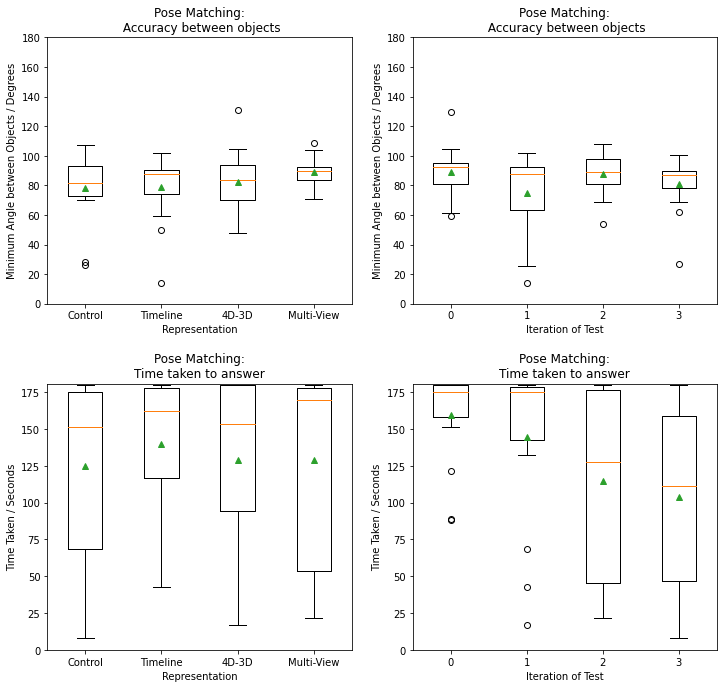

In [32]:
# Show Graphs
fig = plt.figure(figsize = (12, 24))
ax0 = fig.add_subplot(421)
ax1 = fig.add_subplot(422)
ax2 = fig.add_subplot(423)
ax3 = fig.add_subplot(424)
#ax4 = fig.add_subplot(425)
#ax5 = fig.add_subplot(426)
fig.subplots_adjust(hspace=0.3)

ax0.set_title("Pose Matching:\n Accuracy between objects")
x = POSE_accuracy_data(compiled_data).keys()
d = [i for i in POSE_accuracy_data(compiled_data).values()]
ax0.boxplot( d, showmeans=True )
ax0.set_xticks(order, x)
ax0.set_ylim((0, 180))
ax0.set_ylabel("Minimum Angle between Objects / Degrees")
ax0.set_xlabel("Representation")

ax1.set_title("Pose Matching:\n Accuracy between objects")
x = POSE_accuracy_data(ordered_data).keys()
d = [i for i in POSE_accuracy_data(ordered_data).values()]
ax1.boxplot( d, showmeans=True )
ax1.set_xticks(order, x)
ax1.set_ylim((0, 180))
ax1.set_ylabel("Minimum Angle between Objects / Degrees")
ax1.set_xlabel("Iteration of Test")

ax2.set_title("Pose Matching:\nTime taken to answer")
x = POSE_time_data(compiled_data).keys()
d = [i for i in POSE_time_data(compiled_data).values()]
ax2.boxplot( d, showmeans=True )
ax2.set_xticks(order, x)
ax2.set_ylim((0, 181))
ax2.set_ylabel("Time Taken / Seconds")
ax2.set_xlabel("Representation")

ax3.set_title("Pose Matching:\nTime taken to answer")
x = POSE_time_data(ordered_data).keys()
d = [i for i in POSE_time_data(ordered_data).values()]
ax3.boxplot( d, showmeans=True )
ax3.set_xticks(order, x)
ax3.set_ylim((0, 181))
ax3.set_ylabel("Time Taken / Seconds")
ax3.set_xlabel("Iteration of Test")

In [ ]:
# Take all the data over representations to measure effectiveness of each representation

# Take all the data over order index (always 0 1 2 3) to measure progress as they used the system
#   was there continuous improvement with each new representation
#       (Overlay the graphs)